In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Set size of figures and fonts

In [67]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 16})

In [68]:
df = pd.read_csv('../csv/final_eda.csv')

Create column with Elo difference

In [69]:
df['EloDiff'] = df['WhiteElo'] - df['BlackElo']

Split chess formats into dataframes

In [70]:
df_blitz = df[df['Event'] == 'Blitz']
df_bullet = df[df['Event'] == 'Bullet']
df_classical = df[df['Event'] == 'Classical']
df_correspondence = df[df['Event'] == 'Correspondence']

In [71]:
df.head()

,Event,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Event_enc,ECO_enc,Termination_enc,TimeControl_enc,EloDiff
0,Classical,1,1901,1896,11.0,-11.0,D10,Slav Defense,300,Time forfeit,2,310,1,8,5
1,Blitz,2,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300,Normal,0,220,0,8,14
2,Blitz,1,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180,Time forfeit,0,101,1,6,-41
3,Correspondence,1,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,0,Normal,3,0,0,0,389
4,Blitz,2,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180,Time forfeit,0,190,1,6,45


Checking for NaN values

In [72]:
df.isnull().sum()

Event              0
Result             0
WhiteElo           0
BlackElo           0
WhiteRatingDiff    0
BlackRatingDiff    0
ECO                0
Opening            0
TimeControl        0
Termination        0
Event_enc          0
ECO_enc            0
Termination_enc    0
TimeControl_enc    0
EloDiff            0
dtype: int64

<AxesSubplot:xlabel='Event', ylabel='count'>

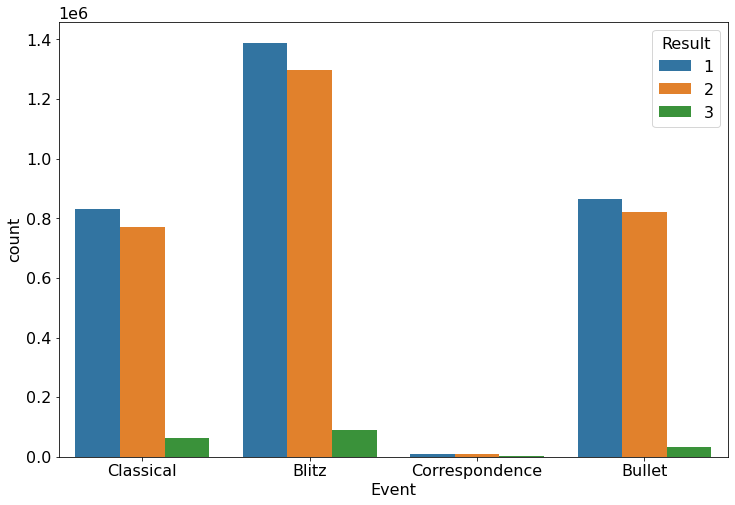

In [73]:
sns.countplot(x = 'Event', hue = 'Result', data = df)

<AxesSubplot:xlabel='Event', ylabel='count'>

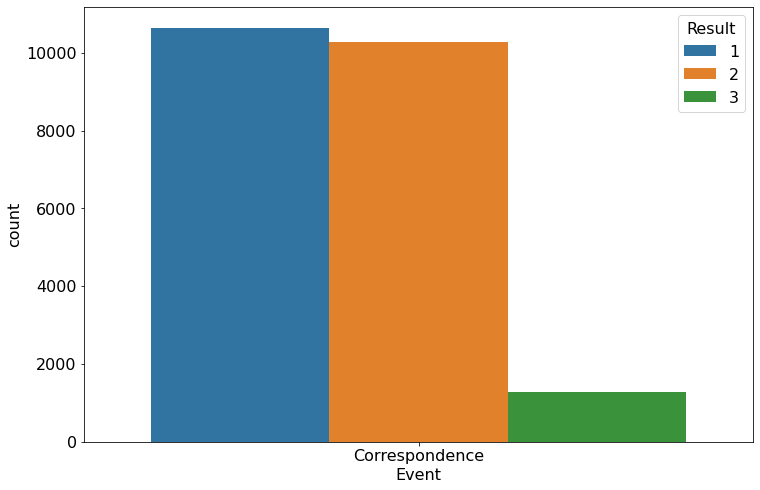

In [74]:
sns.countplot(x = 'Event', hue = 'Result', data = df[df['Event'] == 'Correspondence'])

Count of values from column *Results*

In [75]:
df['Result'].value_counts()

1    3098312
2    2901028
3     187162
Name: Result, dtype: int64

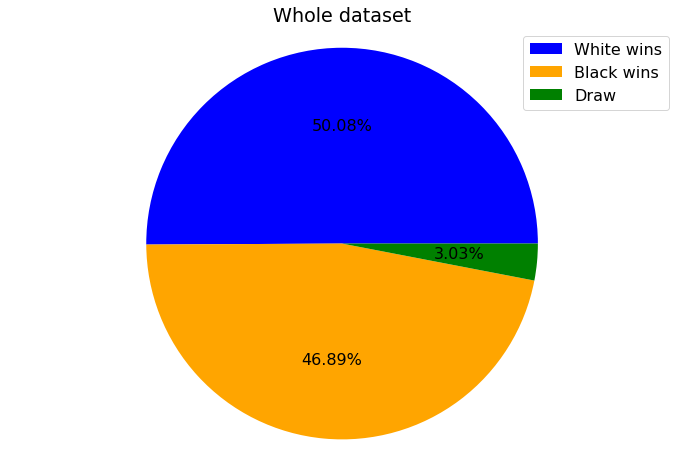

In [76]:
labels = ['White wins', 'Black wins', 'Draw']

colors = ['blue', 'orange', 'green']

sizes = [3098312, 2901028, 187162]

plt.pie(sizes, colors=colors, startangle=0, autopct='%1.2f%%')
plt.title('Whole dataset')
plt.legend(labels)

plt.axis('equal')

plt.show()


In [77]:
df_classical['Result'].value_counts()

1    832910
2    769502
3     62657
Name: Result, dtype: int64

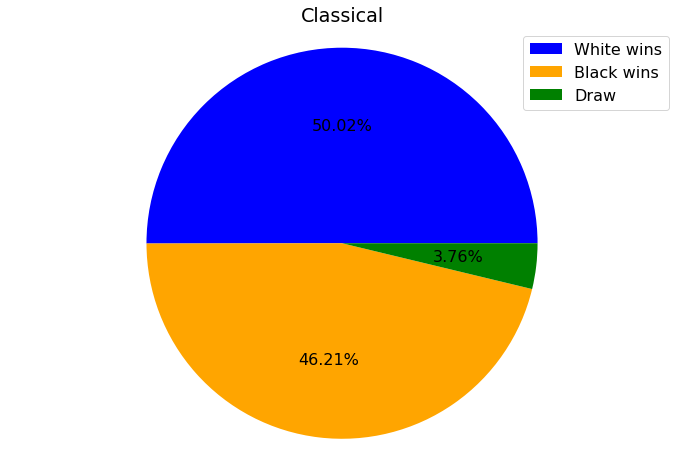

In [78]:
labels = ['White wins', 'Black wins', 'Draw']

colors=['blue', 'orange', 'green']

sizes= [832910, 769502, 62657]

plt.pie(sizes, colors=colors, startangle=0, autopct='%1.2f%%')
plt.title('Classical')
plt.legend(labels)

plt.axis('equal')

plt.show()


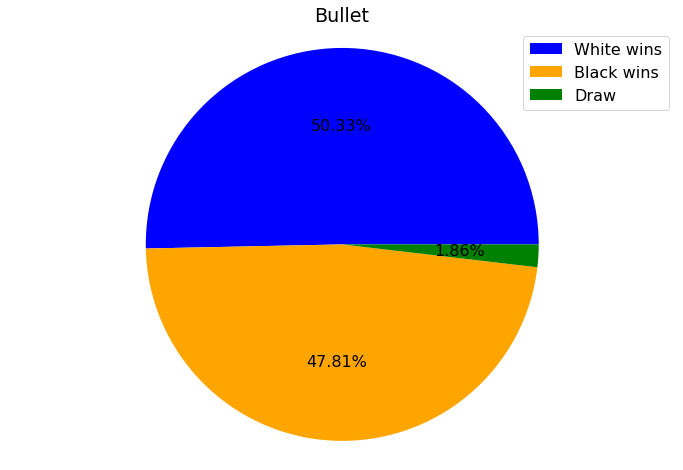

In [79]:
labels = ['White wins', 'Black wins', 'Draw']

colors=['blue', 'orange', 'green']

sizes= [865295, 821940, 31919]

plt.pie(sizes, colors=colors, startangle=0, autopct='%1.2f%%')
plt.title('Bullet')
plt.legend(labels)

plt.axis('equal')

plt.show()


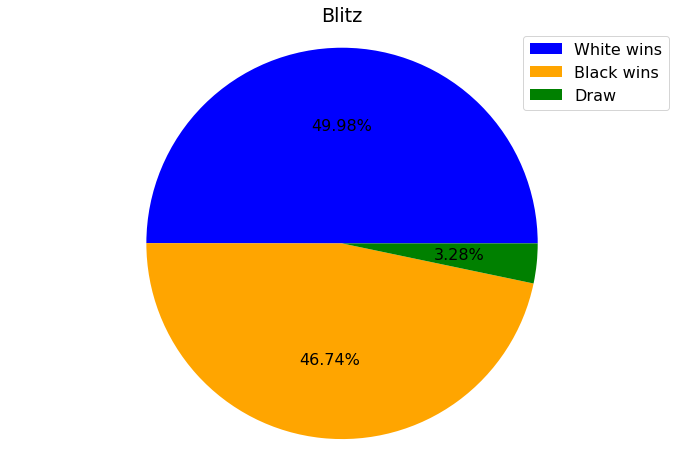

In [80]:
labels = ['White wins', 'Black wins', 'Draw']

colors=['blue', 'orange', 'green']

sizes= [1389461, 1299309, 91307]

plt.pie(sizes, colors=colors, startangle=0, autopct='%1.2f%%')
plt.title('Blitz')
plt.legend(labels)

plt.axis('equal')

plt.show()


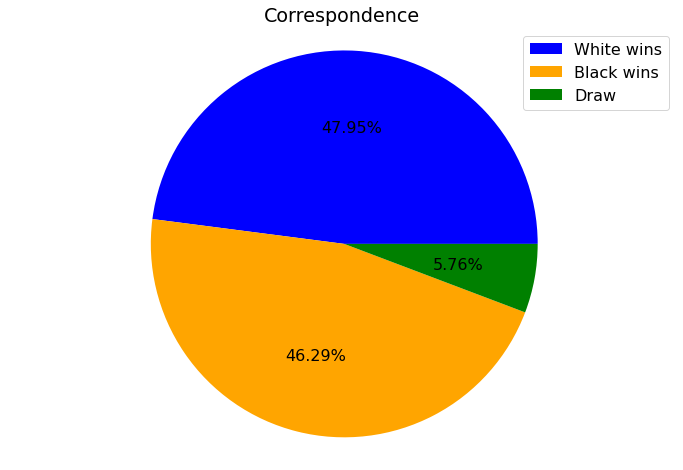

In [81]:
labels = ['White wins', 'Black wins', 'Draw']

colors=['blue', 'orange', 'green']

sizes= [10646, 10277, 1279]

plt.pie(sizes, colors=colors, startangle=0, autopct='%1.2f%%')
plt.title('Correspondence')
plt.legend(labels)

plt.axis('equal')

plt.show()


In [82]:
df['Termination'].value_counts()

Normal          4227924
Time forfeit    1958578
Name: Termination, dtype: int64

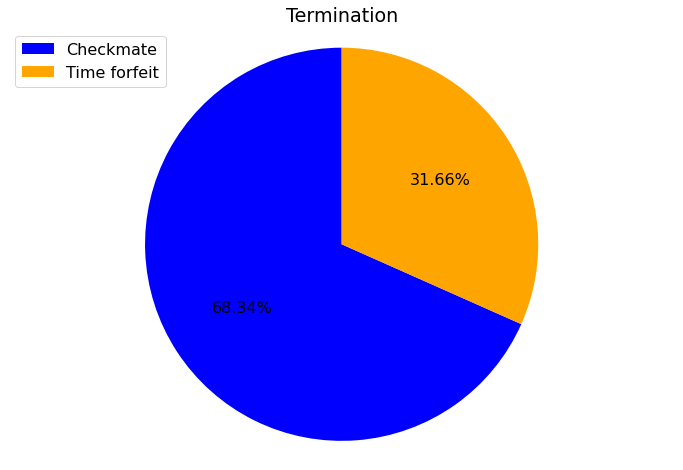

In [83]:
labels= ['Checkmate', 'Time forfeit']

colors=['blue', 'orange']

sizes= [4227924, 1958578]

plt.pie(sizes, colors=colors, startangle=90, autopct='%1.2f%%')
plt.title('Termination')
plt.legend(labels)

plt.axis('equal')

plt.show()


<AxesSubplot:xlabel='TimeControl', ylabel='count'>

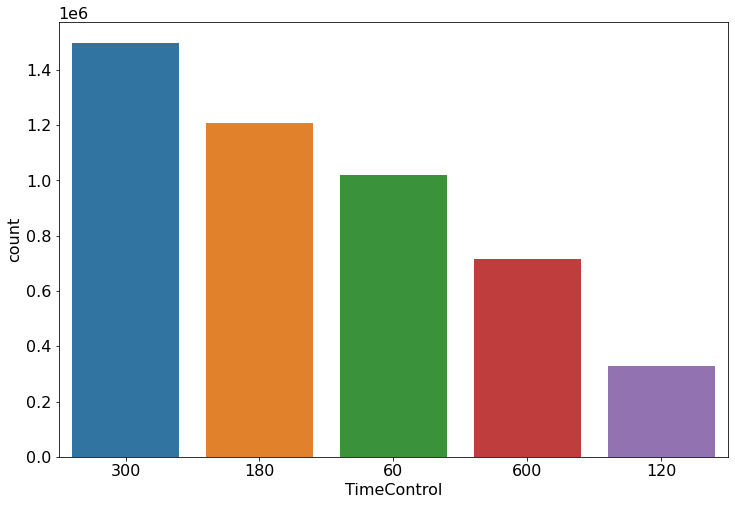

In [84]:
sns.countplot(x = 'TimeControl', data = df, order = df['TimeControl'].value_counts().index[:5])

<AxesSubplot:xlabel='ECO', ylabel='count'>

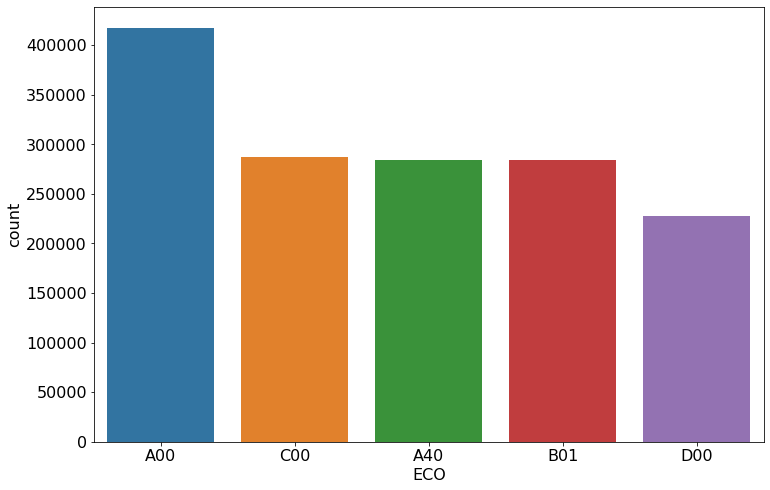

In [85]:
sns.countplot(x = 'ECO', data = df, order = df['ECO'].value_counts().index[:5])

In [86]:
df['ECO'].value_counts()

A00    417574
C00    287166
A40    284380
B01    283940
D00    227305
        ...  
E55         5
A79         5
C76         1
E96         1
B69         1
Name: ECO, Length: 493, dtype: int64

<AxesSubplot:xlabel='ECO', ylabel='count'>

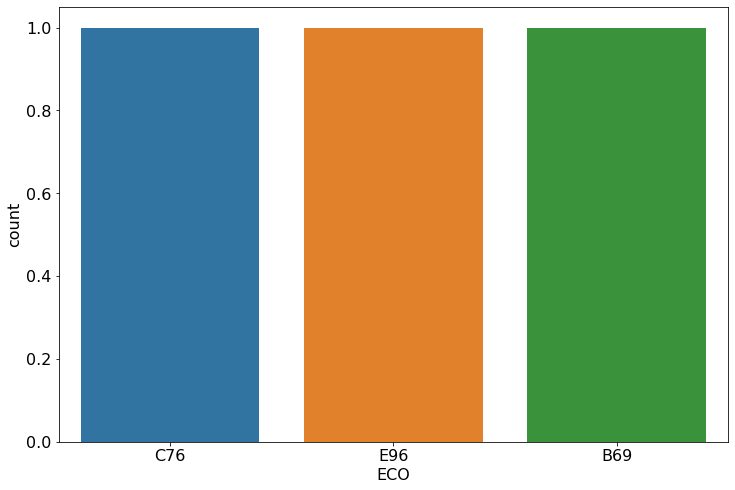

In [87]:
sns.countplot(x = 'ECO', data = df, order = df['ECO'].value_counts().index[-3:])

# Analysis and compare results with Elo theory

# Difference between 0 - 3 points

### White

In [88]:
elodiff_over_1 = df[df['EloDiff'] <= 3]
elodiff_over_1 = elodiff_over_1[elodiff_over_1['EloDiff'] >= 0]
elodiff_over_1['Result'].value_counts()

1    36268
2    33509
3     2620
Name: Result, dtype: int64

In [89]:
elodiff_over_1['EloDiff'].value_counts()

0    19806
1    17687
2    17509
3    17395
Name: EloDiff, dtype: int64

In [90]:
elodiff_over_1['EloDiff'].count()

72397

### Black

In [91]:
elodiff_under_1 = df[df['EloDiff'] >= -3]
elodiff_under_1 = elodiff_under_1[elodiff_under_1['EloDiff'] <= 0]
elodiff_under_1['Result'].value_counts()

1    36079
2    33947
3     2676
Name: Result, dtype: int64

In [92]:
elodiff_under_1['EloDiff'].value_counts()

 0    19806
-1    17726
-2    17617
-3    17553
Name: EloDiff, dtype: int64

In [93]:
elodiff_under_1['EloDiff'].count()

72702

# Difference between 69 - 76 points

### White

In [94]:
elodiff_over_2 = df[df['EloDiff'] >= 69]
elodiff_over_2 = elodiff_over_2[elodiff_over_2['EloDiff'] <= 76]
elodiff_over_2['Result'].value_counts()

1    62926
2    40996
3     3650
Name: Result, dtype: int64

In [95]:
elodiff_over_2['EloDiff'].value_counts()

69    13852
71    13650
70    13644
72    13422
73    13351
75    13278
76    13211
74    13164
Name: EloDiff, dtype: int64

In [96]:
elodiff_over_2['EloDiff'].count()

107572

### Black

In [97]:
elodiff_under_2 = df[df['EloDiff'] >= -76]
elodiff_under_2 = elodiff_under_2[elodiff_under_2['EloDiff'] <= -69]
elodiff_under_2['Result'].value_counts()

2    58659
1    43913
3     3697
Name: Result, dtype: int64

In [98]:
elodiff_under_2['EloDiff'].value_counts()

-69    13580
-70    13506
-72    13442
-71    13347
-73    13226
-75    13157
-74    13083
-76    12928
Name: EloDiff, dtype: int64

In [99]:
elodiff_under_2['EloDiff'].count()

106269

# Difference between 146 - 153 points

### White

In [100]:
elodiff_over_3 = df[df['EloDiff'] >= 146]
elodiff_over_3 = elodiff_over_3[elodiff_over_3['EloDiff'] <= 153]
elodiff_over_3['Result'].value_counts()

1    43381
2    19338
3     1924
Name: Result, dtype: int64

In [101]:
elodiff_over_3['EloDiff'].value_counts()

146    8317
147    8287
150    8160
148    8155
149    8147
152    7892
151    7892
153    7793
Name: EloDiff, dtype: int64

In [102]:
elodiff_over_3['EloDiff'].count()

64643

### Black

In [103]:
elodiff_under_3 = df[df['EloDiff'] >= -153]
elodiff_under_3 = elodiff_under_3[elodiff_under_3['EloDiff'] <= -146]
elodiff_under_3['Result'].value_counts()

2    40519
1    20993
3     2049
Name: Result, dtype: int64

In [104]:
elodiff_under_3['EloDiff'].value_counts()

-147    8151
-146    8114
-148    8095
-149    8077
-152    7866
-150    7816
-151    7789
-153    7653
Name: EloDiff, dtype: int64

In [105]:
elodiff_under_3['EloDiff'].count()

63561

# Difference between 236 - 245 points

### White

In [106]:
elodiff_over_4 = df[df['EloDiff'] >= 236]
elodiff_over_4 = elodiff_over_4[elodiff_over_4['EloDiff'] <= 245]
elodiff_over_4['Result'].value_counts()

1    32103
2     9265
3      988
Name: Result, dtype: int64

In [107]:
elodiff_over_4['EloDiff'].value_counts()

236    4382
240    4306
241    4287
237    4271
238    4259
239    4212
243    4180
245    4174
244    4166
242    4119
Name: EloDiff, dtype: int64

In [108]:
elodiff_over_4['EloDiff'].count()

42356

### Black

In [109]:
elodiff_under_4 = df[df['EloDiff'] >= -245]
elodiff_under_4 = elodiff_under_4[elodiff_under_4['EloDiff'] <= -236]
elodiff_under_4['Result'].value_counts()

2    30595
1    10213
3     1050
Name: Result, dtype: int64

In [110]:
elodiff_under_4['EloDiff'].value_counts()

-237    4313
-236    4275
-239    4240
-238    4232
-245    4194
-242    4166
-241    4164
-240    4125
-243    4112
-244    4037
Name: EloDiff, dtype: int64

In [111]:
elodiff_under_4['EloDiff'].count()

41858

# Difference between 358 - 374 points

### White

In [112]:
elodiff_over_5 = df[df['EloDiff'] >= 358]
elodiff_over_5 = elodiff_over_5[elodiff_over_5['EloDiff'] <= 374]
elodiff_over_5['Result'].value_counts()

1    26034
2     4218
3      492
Name: Result, dtype: int64

In [113]:
elodiff_over_5['EloDiff'].min()

358

In [114]:
elodiff_over_5['EloDiff'].max()

374

In [115]:
elodiff_over_5['EloDiff'].count()

30744

### Black

In [116]:
elodiff_under_5 = df[df['EloDiff'] >= -374]
elodiff_under_5 = elodiff_under_5[elodiff_under_5['EloDiff'] <= -358]
elodiff_under_5['Result'].value_counts()

2    24300
1     4541
3      573
Name: Result, dtype: int64

In [117]:
elodiff_under_5['EloDiff'].min()

-374

In [118]:
elodiff_under_5['EloDiff'].max()

-358

In [119]:
elodiff_under_5['EloDiff'].count()

29414

# Difference between over 735 points

### White

In [120]:
elodiff_over_6 = df[df['EloDiff'] >= 735]
elodiff_over_6['Result'].value_counts()

1    12929
2      391
3       44
Name: Result, dtype: int64

In [121]:
elodiff_over_6['EloDiff'].max()

1702

In [122]:
elodiff_over_6['EloDiff'].min()

735

In [123]:
elodiff_over_6['EloDiff'].count()

13364

### Black

In [124]:
elodiff_under_6 = df[df['EloDiff'] <= -735]
elodiff_under_6['Result'].value_counts()

2    12604
1      475
3       68
Name: Result, dtype: int64

In [125]:
elodiff_under_6['EloDiff'].min()

-1691

In [126]:
elodiff_under_6['EloDiff'].max()

-735

In [127]:
elodiff_under_6['EloDiff'].count()

13147

In [128]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='report.html')